In [18]:
# Install dependencies
!pip install -q -U pandas plotly nbformat kaleido


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


Label Denmark Finland Iceland Norway Sweden
1943      6.6       -       -      -      -
1944      6.8       -       -      -      -
1945      6.5       -       -      -      -
1946      6.9       -       -      -      -
1947      6.2       -       -      -      -
...       ...     ...     ...    ...    ...
2016     13.6    13.7    13.3   11.2   11.8
2017     13.7    13.5    12.6   12.1   12.2
2018     13.9    13.4    14.9   11.7   12.0
2019     14.0    13.8    13.8   12.2   12.3
2020     13.2    13.2    14.2   11.3   11.2

[78 rows x 5 columns]


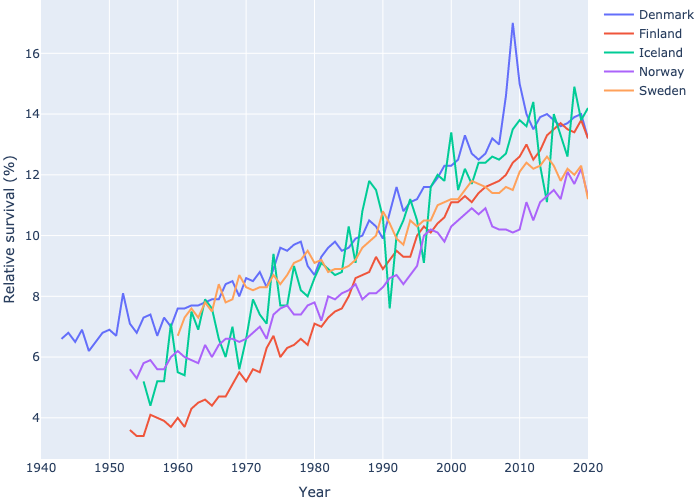

In [19]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import os


# load cancer data
data = pd.read_csv("../data/NCdata-trends-cum_risk-pop(578,246,208,352,752)-can(180)-incidence-females-age(0-84)-y(1943-2020).csv", header=0, index_col=0)
data = data.T

print(data)

figures = []
for country in data.columns:
    figures.append(
        go.Scatter(
            name=country,
            x=np.asarray(data.index).astype("int"),
            y=data[country],
            mode='lines',
            showlegend=True,
        )
    )

layout = go.Layout(
    #xaxis=dict(title="Period of diagnosis"),
    xaxis=dict(
        title="Year",
        tickmode='linear', #change 1
        tick0=1960,#data.index.min(),
        dtick=10,
        tickvals=data.index,
    ),
    yaxis=dict(title="Relative survival (%)")
)

fig = go.Figure(figures, layout=layout, layout_xaxis_range=[1940, 2020])
fig.update_layout(
    margin=go.layout.Margin(
        l=0, #left margin
        r=0, #right margin
        b=0, #bottom margin
        t=0  #top margin
    )
)

os.makedirs("results/", exist_ok=True)

fig.show(renderer="png")
fig.write_image("results/bc_incidence_over_time.png")
